In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import sklearn.metrics as mt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
#Reading data:

df = pd.read_csv("/kaggle/input/ku-har-raw/KU-HAR_time_domain_subsamples_20750x300.csv",header=None)
dff = df.values
signals = dff[:, 0: 1800]                         #These are the time-domian subsamples (signals) 
signals = np.array(signals, dtype=np.float32)
labels = dff[:, 1800]                             #These are their associated class labels (signals)

print(signals.shape)
print(labels.shape)

(20750, 1800)
(20750,)


In [3]:
# convert array into dataframe 
Y = pd.DataFrame(labels) 
  
# save the dataframe as a csv file 
Y.to_csv("Y_kuhar.csv")

In [4]:
Acc_X = df[df.columns[ 0: 300]]
Acc_Y = df[df.columns[ 300: 600]]
Acc_Z = df[df.columns[ 600: 900]]
Gyr_X = df[df.columns[ 900: 1200]]
Gyr_Y = df[df.columns[ 1200: 1500]]
Gyr_Z = df[df.columns[ 1500: 1800]]

In [5]:
Acc_X.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.004230,-0.000280,-0.013906,-0.002544,0.027433,0.058300,0.051670,0.071857,0.080653,0.047917,...,0.112880,0.100820,0.075487,0.041669,-0.005319,-0.028872,-0.049143,-0.054671,-0.032428,-0.027888
1,0.012482,0.032496,0.067856,0.071552,0.078103,0.040353,-0.001059,-0.018580,-0.026813,-0.011280,...,0.026719,0.011815,0.009799,0.018585,0.020731,0.021815,0.015763,0.025449,0.015005,0.004488
2,0.012127,0.028458,0.062075,0.052611,0.022942,-0.010017,-0.023151,-0.028515,0.005036,0.008450,...,0.060631,0.077351,0.075973,0.064078,0.029611,0.017449,-0.061116,-0.056643,-0.029544,-0.009596
3,0.052964,0.074319,0.110670,0.108490,0.091825,0.056989,0.029337,-0.016724,-0.042265,-0.053983,...,-0.005576,0.011198,0.020559,0.041041,0.050427,0.073637,0.064447,0.017279,-0.000149,-0.022203
4,-0.020462,-0.030787,-0.008617,0.008906,0.045046,0.042136,0.045037,0.045182,0.025113,0.021730,...,0.037130,0.024847,0.015515,0.002660,0.015992,0.023423,0.014275,0.015910,0.014603,0.031885


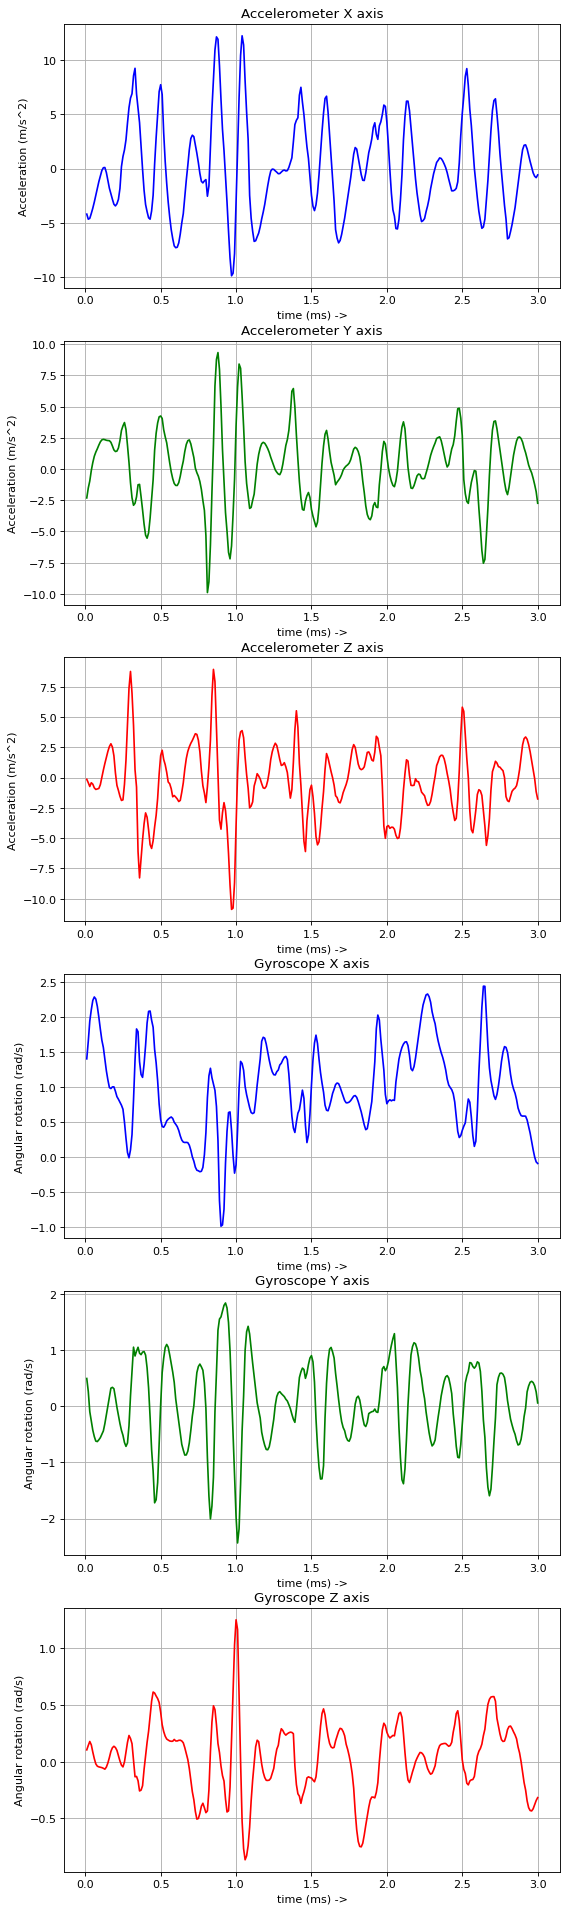

In [6]:
# Visualization of the 20001th (time-domain HAR) sample (channel data):
# The correspondig activity is "Jump"

Accelerometer_X_axis_data = signals[6000, 0: 300]
Accelerometer_Y_axis_data = signals[6000, 300: 600]
Accelerometer_Z_axis_data = signals[6000, 600: 900]
Gyroscope_X_axis_data = signals[6000, 900: 1200]
Gyroscope_Y_axis_data = signals[6000, 1200: 1500]
Gyroscope_Z_axis_data = signals[6000, 1500: 1800]
time = np.linspace(.01, 3, 300)

figure(figsize=(8, 30), dpi=80)

ax1 = plt.subplot(611)
ax1.plot(time, Accelerometer_X_axis_data, 'b')
ax1.title.set_text('Accelerometer X axis')
ax1.set_xlabel('time (ms) ->')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.grid(True)

ax2 = plt.subplot(612)
ax2.plot(time, Accelerometer_Y_axis_data, 'g')
ax2.title.set_text('Accelerometer Y axis')
ax2.set_xlabel('time (ms) ->')
ax2.set_ylabel('Acceleration (m/s^2)')
ax2.grid(True)

ax3 = plt.subplot(613)
ax3.plot(time, Accelerometer_Z_axis_data, 'r')
ax3.title.set_text('Accelerometer Z axis')
ax3.set_xlabel('time (ms) ->')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.grid(True)

ax4 = plt.subplot(614)
ax4.plot(time, Gyroscope_X_axis_data, 'b')
ax4.title.set_text('Gyroscope X axis')
ax4.set_xlabel('time (ms) ->')
ax4.set_ylabel('Angular rotation (rad/s)')
ax4.grid(True)

ax5 = plt.subplot(615)
ax5.plot(time, Gyroscope_Y_axis_data, 'g')
ax5.title.set_text('Gyroscope Y axis')
ax5.set_xlabel('time (ms) ->')
ax5.set_ylabel('Angular rotation (rad/s)')
ax5.grid(True)

ax6 = plt.subplot(616)
ax6.plot(time, Gyroscope_Z_axis_data, 'r')
ax6.title.set_text('Gyroscope Z axis')
ax6.set_xlabel('time (ms) ->')
ax6.set_ylabel('Angular rotation (rad/s)')
ax6.grid(True)

plt.show()

In [7]:
Acc_X = Acc_X.fillna(0)
Acc_Y = Acc_Y.fillna(0)
Acc_Z = Acc_Z.fillna(0)
Gyr_X = Gyr_X.fillna(0)
Gyr_Y = Gyr_Y.fillna(0)
Gyr_Z = Gyr_Z.fillna(0)

In [8]:
Acc_X.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.004230,-0.000280,-0.013906,-0.002544,0.027433,0.058300,0.051670,0.071857,0.080653,0.047917,...,0.112880,0.100820,0.075487,0.041669,-0.005319,-0.028872,-0.049143,-0.054671,-0.032428,-0.027888
1,0.012482,0.032496,0.067856,0.071552,0.078103,0.040353,-0.001059,-0.018580,-0.026813,-0.011280,...,0.026719,0.011815,0.009799,0.018585,0.020731,0.021815,0.015763,0.025449,0.015005,0.004488
2,0.012127,0.028458,0.062075,0.052611,0.022942,-0.010017,-0.023151,-0.028515,0.005036,0.008450,...,0.060631,0.077351,0.075973,0.064078,0.029611,0.017449,-0.061116,-0.056643,-0.029544,-0.009596
3,0.052964,0.074319,0.110670,0.108490,0.091825,0.056989,0.029337,-0.016724,-0.042265,-0.053983,...,-0.005576,0.011198,0.020559,0.041041,0.050427,0.073637,0.064447,0.017279,-0.000149,-0.022203
4,-0.020462,-0.030787,-0.008617,0.008906,0.045046,0.042136,0.045037,0.045182,0.025113,0.021730,...,0.037130,0.024847,0.015515,0.002660,0.015992,0.023423,0.014275,0.015910,0.014603,0.031885


In [9]:
acc_X = Acc_X.to_numpy()
acc_Y = Acc_Y.to_numpy()
acc_Z = Acc_Z.to_numpy()
gyr_X = Gyr_X.to_numpy()
gyr_Y = Gyr_Y.to_numpy()
gyr_Z = Gyr_Z.to_numpy()

In [10]:
print(acc_X.shape)
print(acc_Y.shape)
print(acc_Z.shape)
print(gyr_X.shape)
print(gyr_Y.shape)
print(gyr_Z.shape)


(20750, 300)
(20750, 300)
(20750, 300)
(20750, 300)
(20750, 300)
(20750, 300)


In [11]:
acc_mag= np.sqrt(np.square(acc_X)+np.square(acc_Y)+np.square(acc_Z))

In [12]:
acc_mag.shape

(20750, 300)

In [13]:
acc_mag_mean=np.mean(acc_mag,axis=1)  

In [14]:
acc_mag_mean.shape

(20750,)

In [15]:
acc_mag_mean=acc_mag_mean.reshape(20750,1)

In [16]:
acc_mag_mean.shape   #f7

(20750, 1)

In [17]:
acc_mag_std=np.std(acc_mag,axis=1)

In [18]:
acc_mag_std.shape  
acc_mag_std=acc_mag_std.reshape(20750,1)

In [19]:
acc_mag_std.shape   #f8

(20750, 1)

In [20]:
print(acc_mag_std[0])
print(acc_mag_mean[0])

[0.04618158]
[0.09880097]


In [21]:
body_acc_x_train_mean=np.mean(acc_X,axis=1)
body_acc_y_train_mean=np.mean(acc_Y,axis=1)
body_acc_z_train_mean=np.mean(acc_Z,axis=1)
body_gyro_x_train_mean=np.mean(gyr_X,axis=1)
body_gyro_y_train_mean=np.mean(gyr_Y,axis=1)
body_gyro_z_train_mean=np.mean(gyr_Z,axis=1)


In [22]:
body_acc_x_train_mean=body_acc_x_train_mean.reshape(20750,1)
body_acc_y_train_mean=body_acc_y_train_mean.reshape(20750,1)
body_acc_z_train_mean=body_acc_z_train_mean.reshape(20750,1)
body_gyro_x_train_mean=body_gyro_x_train_mean.reshape(20750,1)
body_gyro_y_train_mean=body_gyro_y_train_mean.reshape(20750,1)
body_gyro_z_train_mean=body_gyro_z_train_mean.reshape(20750,1)

In [23]:
print(body_acc_x_train_mean.shape)  #f1
print(body_acc_y_train_mean.shape)   #f2
print(body_acc_z_train_mean.shape)    #f3
print(body_gyro_x_train_mean.shape)     #f4
print(body_gyro_y_train_mean.shape)    #f5
print(body_gyro_z_train_mean.shape)      #f6


(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)


In [24]:

thetax=np.arccos((acc_X)/9.8)
thetax[np.isnan(thetax)] = 0

thetay=np.arccos((acc_Y)/9.8)
thetay[np.isnan(thetay)] = 0

thetaz=np.arccos((acc_Z)/9.8)
thetaz[np.isnan(thetaz)] = 0

/tmp/ipykernel_24/1878607084.py:1: RuntimeWarning: invalid value encountered in arccos
  thetax=np.arccos((acc_X)/9.8)
/tmp/ipykernel_24/1878607084.py:4: RuntimeWarning: invalid value encountered in arccos
  thetay=np.arccos((acc_Y)/9.8)
/tmp/ipykernel_24/1878607084.py:7: RuntimeWarning: invalid value encountered in arccos
  thetaz=np.arccos((acc_Z)/9.8)


In [25]:
thetax.shape

(20750, 300)

In [26]:
thetax_mean=np.mean(thetax,axis=1)  
thetax_std=np.std(thetax,axis=1)

thetay_mean=np.mean(thetay,axis=1)  
thetay_std=np.std(thetay,axis=1)

thetaz_mean=np.mean(thetaz,axis=1)  
thetaz_std=np.std(thetaz,axis=1)

In [27]:
thetax_mean.shape
thetax_std.shape

thetay_mean.shape
thetay_std.shape

thetaz_mean.shape
thetaz_std.shape

(20750,)

In [28]:
thetax_mean=thetax_mean.reshape(20750,1)
thetax_std=thetax_std.reshape(20750,1)
thetay_mean=thetay_mean.reshape(20750,1)
thetay_std=thetay_std.reshape(20750,1)
thetaz_mean=thetaz_mean.reshape(20750,1)
thetaz_std=thetaz_std.reshape(20750,1)

In [29]:
thetax_mean.shape      #f9
thetax_std.shape      #f10

thetay_mean.shape       #f11
thetay_std.shape        #f12

thetaz_mean.shape       #f13
thetaz_std.shape        #f14

(20750, 1)

In [30]:
# Importing mean, absolute from numpy 
from numpy import mean, absolute 
#absolute mean deviation
absmeanx=absolute(gyr_X - mean(gyr_X))
absmeany=absolute(gyr_Y - mean(gyr_Y))
absmeanz=absolute(gyr_Z - mean(gyr_Z))

In [31]:
print(absmeanx)
print(absmeanx.shape)
print(absmeany)
print(absmeany.shape)
print(absmeanz)
print(absmeanz.shape)

[[0.49276663 0.49354015 0.49567876 ... 0.52330286 0.52514286 0.52147686]
 [0.51704286 0.51789486 0.51665986 ... 0.52053786 0.51953086 0.52116386]
 [0.52392086 0.52274686 0.52093186 ... 0.49807146 0.49321126 0.49227251]
 ...
 [0.42905586 0.27055386 0.20251386 ... 0.52415986 0.63409386 0.77460386]
 [1.22633386 1.40133386 1.50272386 ... 0.47060786 0.47407086 0.45006386]
 [0.11119386 0.12961386 0.20515386 ... 0.20371386 0.20871386 0.33925386]]
(20750, 300)
[[75.53687595 75.53926195 75.54751965 ... 75.54678425 75.55437215
  75.55703465]
 [75.55988895 75.55333505 75.54779065 ... 75.54166095 75.54582965
  75.54466255]
 [75.54237385 75.53646695 75.53225195 ... 75.56227495 75.57161395
  75.57431595]
 ...
 [76.43143995 76.51496995 76.48617995 ... 74.84152995 75.08437995
  75.12398995]
 [75.18558995 75.21073995 75.24150995 ... 76.04056995 76.00639995
  75.99431995]
 [76.38873995 76.41419995 76.48499995 ... 74.96237995 74.95827995
  74.97311995]]
(20750, 300)
[[140.37990999 140.38063644 140.381015

In [32]:
absmeanx_mean=np.mean(absmeanx,axis=1)  
absmeanx_std=np.std(absmeanx,axis=1)

absmeany_mean=np.mean(absmeany,axis=1)  
absmeany_std=np.std(absmeany,axis=1)

absmeanz_mean=np.mean(absmeanz,axis=1)  
absmeanz_std=np.std(absmeanz,axis=1)

In [33]:
absmeanx_mean.shape  
absmeanx_std.shape 

absmeany_mean.shape   
absmeany_std.shape 

absmeanz_mean.shape   
absmeanz_std.shape 

(20750,)

In [34]:
absmeanx_mean=absmeanx_mean.reshape(20750,1)
absmeanx_std=absmeanx_std.reshape(20750,1)
absmeany_mean=absmeany_mean.reshape(20750,1)
absmeany_std=absmeany_std.reshape(20750,1)
absmeanz_mean=absmeanz_mean.reshape(20750,1)
absmeanz_std=absmeanz_std.reshape(20750,1)

In [35]:
absmeanx_mean.shape  #f15
absmeanx_std.shape   #f16

absmeany_mean.shape   #f17
absmeany_std.shape    #f18

absmeanz_mean.shape   #f19
absmeanz_std.shape    #f20

(20750, 1)

In [36]:
import numpy as np
from scipy import stats

In [37]:
body_acc_x_train_mad=stats.median_abs_deviation(acc_X, axis=1)
body_acc_y_train_mad=stats.median_abs_deviation(acc_Y, axis=1)
body_acc_z_train_mad=stats.median_abs_deviation(acc_Z, axis=1)
body_gyro_x_train_mad=stats.median_abs_deviation(gyr_X, axis=1)
body_gyro_y_train_mad=stats.median_abs_deviation(gyr_X, axis=1)
body_gyro_z_train_mad=stats.median_abs_deviation(gyr_X, axis=1)

In [38]:
body_acc_x_train_mad.shape
body_acc_y_train_mad.shape
body_acc_z_train_mad.shape
body_gyro_x_train_mad.shape
body_gyro_y_train_mad.shape
body_gyro_z_train_mad.shape

(20750,)

In [39]:
body_acc_x_train_mad=body_acc_x_train_mad.reshape(20750,1)
body_acc_y_train_mad=body_acc_y_train_mad.reshape(20750,1)
body_acc_z_train_mad=body_acc_z_train_mad.reshape(20750,1)
body_gyro_x_train_mad=body_gyro_x_train_mad.reshape(20750,1)
body_gyro_y_train_mad=body_gyro_y_train_mad.reshape(20750,1)
body_gyro_z_train_mad=body_gyro_z_train_mad.reshape(20750,1)

In [40]:
body_acc_x_train_mad.shape   #f21
body_acc_y_train_mad.shape    #f22
body_acc_z_train_mad.shape    #f23
body_gyro_x_train_mad.shape   #f24
body_gyro_y_train_mad.shape  #f25
body_gyro_z_train_mad.shape   #f26


(20750, 1)

In [41]:
body_acc_x_train_std=np.std(acc_X,axis=1) #f27
body_acc_y_train_std=np.std(acc_Y,axis=1)  #f28
body_acc_z_train_std=np.std(acc_Z,axis=1)  #f29
body_gyro_x_train_std=np.std(gyr_X,axis=1)   #f30
body_gyro_y_train_std=np.std(gyr_Y,axis=1)   #f31
body_gyro_z_train_std=np.std(gyr_Z,axis=1)   #f32

In [42]:
body_acc_x_train_std=body_acc_x_train_std.reshape(20750,1)
body_acc_y_train_std=body_acc_y_train_std.reshape(20750,1)
body_acc_z_train_std=body_acc_z_train_std.reshape(20750,1)

body_gyro_x_train_std=body_gyro_x_train_std.reshape(20750,1)
body_gyro_y_train_std=body_gyro_y_train_std.reshape(20750,1)
body_gyro_z_train_std=body_gyro_z_train_std.reshape(20750,1)

In [43]:
costhetax=np.zeros((20750,300))
costhetay=np.zeros((20750,300))
costhetaz=np.zeros((20750,300))

In [44]:
for i in range(0,20750):
    costhetax[i]=np.cos(thetax[i])
    

    costhetay[i]=np.cos(thetay[i])
    

    costhetaz[i]=np.cos(thetaz[i])

In [45]:
costhetax.shape

(20750, 300)

In [46]:
Vertical_acc = np.multiply(acc_X,costhetax) + np.multiply(acc_Y,costhetay) + np.multiply(acc_Z,costhetaz)

In [47]:
Vertical_acc.shape 

(20750, 300)

In [48]:
Horizontal_acc= np.sqrt(np.square(acc_X) + np.square(acc_Y) + np.square(acc_Z) - np.square(Vertical_acc))

/tmp/ipykernel_24/1459452111.py:1: RuntimeWarning: invalid value encountered in sqrt
  Horizontal_acc= np.sqrt(np.square(acc_X) + np.square(acc_Y) + np.square(acc_Z) - np.square(Vertical_acc))


In [49]:
Horizontal_acc.shape

(20750, 300)

In [50]:
Horizontal_acc[np.isnan(Horizontal_acc)] = 0

In [51]:
Vertical_acc_mean=np.mean(Vertical_acc,axis=1)  
Vertical_acc_std=np.std(Vertical_acc,axis=1)

Horizontal_acc_mean=np.mean(Horizontal_acc,axis=1)  
Horizontal_acc_std=np.std(Horizontal_acc,axis=1)

In [52]:
print(Vertical_acc_mean.shape)
print(Vertical_acc_std.shape)

print(Horizontal_acc_mean.shape)
print(Horizontal_acc_std.shape)


(20750,)
(20750,)
(20750,)
(20750,)


In [53]:
Vertical_acc_mean=Vertical_acc_mean.reshape(20750,1)  
Vertical_acc_std=Vertical_acc_std.reshape(20750,1)

Horizontal_acc_mean=Horizontal_acc_mean.reshape(20750,1)  
Horizontal_acc_std=Horizontal_acc_std.reshape(20750,1)

In [54]:
print(Vertical_acc_mean.shape)  #f33
print(Vertical_acc_std.shape)   #f34

print(Horizontal_acc_mean.shape)  #f35
print(Horizontal_acc_std.shape)   #f36

(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)


In [55]:
import matplotlib.pyplot as plt
from scipy import signal

spectra_bx=np.zeros((20750,151))
spectra_by=np.zeros((20750,151))
spectra_bz=np.zeros((20750,151))

freq_bx=np.zeros((20750,151))
freq_by=np.zeros((20750,151))
freq_bz=np.zeros((20750,151))

In [56]:
for i in range(0,20750):
    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_bx[i], spectra_bx[i] = signal.periodogram(acc_X[i], fs=0.50)
    

    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_by[i], spectra_by[i] = signal.periodogram(acc_Y[i], fs=0.50)


    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_bz[i], spectra_bz[i] = signal.periodogram(acc_Z[i], fs=0.50)


In [57]:
# peak height in the power spectrum is an estimate of the RMS amplitude.
ph_RMS_amp_bx = np.sqrt(np.amax(spectra_bx,axis=1))
ph_RMS_amp_by = np.sqrt(np.amax(spectra_by,axis=1))
ph_RMS_amp_bz = np.sqrt(np.amax(spectra_bz,axis=1))

In [58]:
ph_RMS_amp_bx.shape

(20750,)

In [59]:
spectra_gx=np.zeros((20750,151))
spectra_gy=np.zeros((20750,151))
spectra_gz=np.zeros((20750,151))

freq_gx=np.zeros((20750,151))
freq_gy=np.zeros((20750,151))
freq_gz=np.zeros((20750,151))

In [60]:
for i in range(0,20750):
    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_gx[i], spectra_gx[i] = signal.periodogram(gyr_X[i], fs=0.50)
    

    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_gy[i], spectra_gy[i] = signal.periodogram(gyr_Y[i], fs=0.50)


    # The suitable value for fs would be 0.25 Hz as the time step is 4 s.
    freq_gz[i], spectra_gz[i] = signal.periodogram(gyr_Z[i], fs=0.50)


In [61]:
# peak height in the power spectrum is an estimate of the RMS amplitude.
ph_RMS_amp_gx = np.sqrt(np.amax(spectra_gx,axis=1))
ph_RMS_amp_gy = np.sqrt(np.amax(spectra_gy,axis=1))
ph_RMS_amp_gz = np.sqrt(np.amax(spectra_gz,axis=1))

In [62]:
ph_RMS_amp_gx.shape

(20750,)

In [63]:
ph_RMS_amp_bx = ph_RMS_amp_bx.reshape(20750,1)  #f37
ph_RMS_amp_by = ph_RMS_amp_by.reshape(20750,1)  #f38
ph_RMS_amp_bz = ph_RMS_amp_bz.reshape(20750,1)  #f39

ph_RMS_amp_gx = ph_RMS_amp_gx.reshape(20750,1)  #f40
ph_RMS_amp_gy = ph_RMS_amp_gy.reshape(20750,1)  #f41
ph_RMS_amp_gz = ph_RMS_amp_gz.reshape(20750,1)  #f42

In [64]:
q1_body_acc_x_train=np.zeros((20750,1))
q3_body_acc_x_train=np.zeros((20750,1))

q1_body_acc_y_train=np.zeros((20750,1))
q3_body_acc_y_train=np.zeros((20750,1))

q1_body_acc_z_train=np.zeros((20750,1))
q3_body_acc_z_train=np.zeros((20750,1))

q1_body_gyro_x_train=np.zeros((20750,1))
q3_body_gyro_x_train=np.zeros((20750,1))

q1_body_gyro_y_train=np.zeros((20750,1))
q3_body_gyro_y_train=np.zeros((20750,1))

q1_body_gyro_z_train=np.zeros((20750,1))
q3_body_gyro_z_train=np.zeros((20750,1))

In [65]:
for i in range(0,20750):
    q1_body_acc_x_train[i] = np.percentile(acc_X[i], 25)
    q3_body_acc_x_train[i] = np.percentile(acc_X[i], 75)

    q1_body_acc_y_train[i] = np.percentile(acc_Y[i], 25)
    q3_body_acc_y_train[i] = np.percentile(acc_Y[i], 75)

    q1_body_acc_z_train[i] = np.percentile(acc_Z[i], 25)
    q3_body_acc_z_train[i] = np.percentile(acc_Z[i], 75)

    q1_body_gyro_x_train[i] = np.percentile(gyr_X[i], 25)
    q3_body_gyro_x_train[i] = np.percentile(gyr_X[i], 75)

    q1_body_gyro_y_train[i] = np.percentile(gyr_Y[i], 25)
    q3_body_gyro_y_train[i] = np.percentile(gyr_Y[i], 75)

    q1_body_gyro_z_train[i] = np.percentile(gyr_Z[i], 25)
    q3_body_gyro_z_train[i] = np.percentile(gyr_Z[i], 75)

In [66]:
print(q1_body_acc_x_train.shape) #f43
print(q3_body_acc_x_train.shape) #f44
print(q1_body_acc_y_train.shape) #f45
print(q3_body_acc_y_train.shape) #f46
print(q1_body_acc_z_train.shape) #f47
print(q3_body_acc_z_train.shape) #f48
print(q1_body_gyro_x_train.shape) #f49
print(q3_body_gyro_x_train.shape) #f50
print(q1_body_gyro_y_train.shape) #f51
print(q3_body_gyro_y_train.shape) #f52
print(q1_body_gyro_z_train.shape) #f53
print(q3_body_gyro_z_train.shape) #f54

(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)


In [67]:
iqr_bx = q3_body_acc_x_train-q1_body_acc_x_train  #f55
iqr_by = q3_body_acc_y_train-q1_body_acc_y_train  #f56
iqr_bz = q3_body_acc_z_train-q1_body_acc_z_train  #f57

iqr_gx = q3_body_gyro_x_train-q1_body_gyro_x_train #f58
iqr_gy = q3_body_gyro_y_train-q1_body_gyro_y_train #f59
iqr_gz = q3_body_gyro_z_train-q1_body_gyro_z_train #f60

In [68]:
iqr_bx.shape

(20750, 1)

In [69]:
quartile_dev_bx = (iqr_bx) / 2  #f61
quartile_dev_by = (iqr_by) / 2  #f62
quartile_dev_bz = (iqr_bz) / 2  #f63

quartile_dev_gx = (iqr_gx) / 2  #f64
quartile_dev_gy = (iqr_gy) / 2  #f65
quartile_dev_gz = (iqr_gz) / 2  #f66


In [70]:
a_train_xs_skew=np.zeros((20750,1))
a_train_ys_skew=np.zeros((20750,1))
a_train_zs_skew=np.zeros((20750,1))
g_train_xs_skew=np.zeros((20750,1))
g_train_ys_skew=np.zeros((20750,1))
g_train_zs_skew=np.zeros((20750,1))
for i in range(0,20750):
    a_train_xs_skew[i] = stats.skew(acc_X[i])
    a_train_ys_skew[i] = stats.skew(acc_Y[i])
    a_train_zs_skew[i] = stats.skew(acc_Z[i])
    
    g_train_xs_skew[i] = stats.skew(gyr_X[i])
    g_train_ys_skew[i] = stats.skew(gyr_Y[i])
    g_train_zs_skew[i] = stats.skew(gyr_Z[i])
    

In [71]:
print(a_train_xs_skew.shape) #f67
print(a_train_ys_skew.shape) #f68
print(a_train_zs_skew.shape) #f69
print(g_train_xs_skew.shape) #f70
print(g_train_ys_skew.shape) #f71
print(g_train_zs_skew.shape) #f72

(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)


In [72]:
a_train_xs_kurtosis=np.zeros((20750,1))
a_train_ys_kurtosis=np.zeros((20750,1))
a_train_zs_kurtosis=np.zeros((20750,1))
g_train_xs_kurtosis=np.zeros((20750,1))
g_train_ys_kurtosis=np.zeros((20750,1))
g_train_zs_kurtosis=np.zeros((20750,1))
for i in range(0,20750):
    a_train_xs_kurtosis[i] = stats.kurtosis(acc_X[i])
    a_train_ys_kurtosis[i] = stats.kurtosis(acc_Y[i])
    a_train_zs_kurtosis[i] = stats.kurtosis(acc_Z[i])
    
    g_train_xs_kurtosis[i] = stats.kurtosis(gyr_X[i])
    g_train_ys_kurtosis[i] = stats.kurtosis(gyr_Y[i])
    g_train_zs_kurtosis[i] = stats.kurtosis(gyr_Z[i])
    

In [73]:
print(a_train_xs_kurtosis.shape) #f73
print(a_train_ys_kurtosis.shape) #f74
print(a_train_zs_kurtosis.shape) #f75
print(g_train_xs_kurtosis.shape) #f76
print(g_train_ys_kurtosis.shape) #f77
print(g_train_zs_kurtosis.shape) #f78

(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)


In [74]:
a_train_xs_find_peaks=np.zeros((20750,1))
a_train_ys_find_peaks=np.zeros((20750,1))
a_train_zs_find_peaks=np.zeros((20750,1))
g_train_xs_find_peaks=np.zeros((20750,1))
g_train_ys_find_peaks=np.zeros((20750,1))
g_train_zs_find_peaks=np.zeros((20750,1))
for i in range(0,20750):
    a_train_xs_find_peaks[i] = len(signal.find_peaks(acc_X[i]))
    a_train_ys_find_peaks[i] = len(signal.find_peaks(acc_Y[i]))
    a_train_zs_find_peaks[i] = len(signal.find_peaks(acc_Z[i]))
    g_train_xs_find_peaks[i] = len(signal.find_peaks(gyr_X[i]))
    g_train_ys_find_peaks[i] = len(signal.find_peaks(gyr_Y[i]))
    g_train_zs_find_peaks[i] = len(signal.find_peaks(gyr_Z[i]))

In [75]:
print(a_train_xs_find_peaks.shape) #f79
print(a_train_xs_find_peaks.shape) #f80
print(a_train_xs_find_peaks.shape) #f81
print(g_train_xs_find_peaks.shape) #f82
print(g_train_xs_find_peaks.shape) #f83
print(g_train_xs_find_peaks.shape) #f84

(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)
(20750, 1)


In [76]:
feature_vector=np.concatenate([body_acc_x_train_mean,body_acc_y_train_mean,body_acc_z_train_mean,
                              body_gyro_x_train_mean,body_gyro_y_train_mean,body_gyro_z_train_mean,
                              
                              acc_mag_mean,acc_mag_std,
                              thetax_mean,thetax_std,thetay_mean,thetay_std,thetaz_mean,thetaz_std,
                              absmeanx_mean,absmeanx_std,absmeany_mean,absmeany_std,absmeanz_mean,absmeanz_std,
                              body_acc_x_train_mad,body_acc_y_train_mad,body_acc_z_train_mad,
                              body_gyro_x_train_mad,body_gyro_y_train_mad,body_gyro_z_train_mad,
                              
                              body_acc_x_train_std,body_acc_y_train_std,body_acc_z_train_std,
                              body_gyro_x_train_std,body_gyro_y_train_std,body_gyro_z_train_std,
                              a_train_xs_skew,a_train_ys_skew,a_train_zs_skew,
                              g_train_xs_skew,g_train_ys_skew,g_train_zs_skew,
                               a_train_xs_kurtosis,a_train_ys_kurtosis,a_train_zs_kurtosis,
                              g_train_xs_kurtosis,g_train_ys_kurtosis,g_train_zs_kurtosis,
                               a_train_xs_find_peaks,a_train_ys_find_peaks,a_train_zs_find_peaks,
                               g_train_xs_find_peaks,g_train_ys_find_peaks,g_train_zs_find_peaks,
                               
                              Vertical_acc_mean,Vertical_acc_std,Horizontal_acc_mean,Horizontal_acc_std,
                              ph_RMS_amp_bx,ph_RMS_amp_by,ph_RMS_amp_bz,
                              ph_RMS_amp_gx,ph_RMS_amp_gy,ph_RMS_amp_gz,
                              
                              q1_body_acc_x_train,q1_body_acc_y_train,q1_body_acc_z_train,
                              q1_body_gyro_x_train,q1_body_gyro_y_train,q1_body_gyro_z_train,
                              
                              q3_body_acc_x_train,q3_body_acc_y_train,q3_body_acc_z_train,
                              q3_body_gyro_x_train,q3_body_gyro_y_train,q3_body_gyro_z_train,
                              
                              iqr_bx,iqr_by,iqr_bz,
                              iqr_gx,iqr_gy,iqr_gz,
                              
                              quartile_dev_bx,quartile_dev_by,quartile_dev_bz,
                              quartile_dev_gx,quartile_dev_gy,quartile_dev_gz,
                              ],axis=1)

In [77]:
feature_vector.shape

(20750, 84)

In [78]:
train_X=np.zeros((20750, 84))

In [79]:
for i in range(0,20750):
    train_X[i]= (feature_vector[i] - np.amax(feature_vector[i]) + (feature_vector[i] - np.amin(feature_vector[i])))/(np.amax(feature_vector[i])-np.amin(feature_vector[i]))

In [80]:
train_X.shape

(20750, 84)

In [81]:
phitrain_X=np.arccos(train_X)

In [82]:
phitrain_X.shape

(20750, 84)

In [83]:
import math
import matplotlib.pyplot as plot
def cos_sum(phi_X):
    gasf=np.zeros((84,84))
    for i in range(0,84):
        for j in range(0,84):
            gasf[i][j]= math.cos(phi_X[i]+phi_X[j])
    return gasf

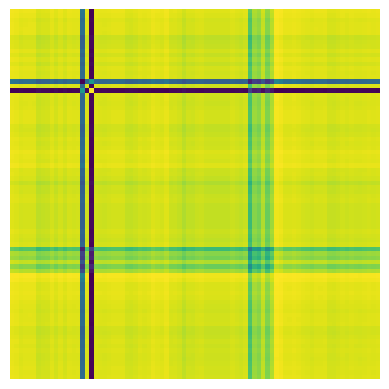

In [84]:
for i in range(20000,20750):
    gasf=cos_sum(phitrain_X[i])
    plot.imshow(gasf)
    plot.axis('off')
    plot.savefig(str(i)+".png",bbox_inches='tight', pad_inches=0)
    #plot.show()